### Age Detection of Indian Actors

In [10]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer
import keras
import imageio # To read images
from PIL import Image # For image resizing 

In [6]:
# Reading the data
train = pd.read_csv('age_detection_train/train.csv')
test = pd.read_csv('age_detection_test/test.csv')

Age group: MIDDLE


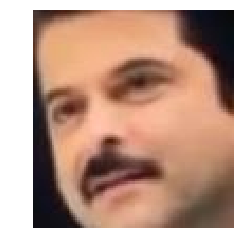

In [8]:
# Displaying any random movie character along with age group
np.random.seed(10)
idx = np.random.choice(train.index)
img_name = train.ID[idx]
img = imageio.imread(os.path.join('age_detection_train/Train', img_name))

print('Age group:', train.Class[idx])
plt.imshow(img)
plt.axis('off')
plt.show()

### Few problems with the images:
- Variations in shape: One image has a shape of (66, 46) whereas another has (102, 87).
- Multiple viewpoints: Faces with different view possible!
- Discrepancy in brightness and contrast.
- Quality of images: Some images were found to be too pixelated.

In [12]:
temp = []
for img_name in train.ID:
    img_path = os.path.join('age_detection_train/Train', img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')    
    temp.append(img)

train_x = np.stack(temp)

In [13]:
# Image resizing of test data into single numpy array
temp = []
for img_name in test.ID:
    img_path = os.path.join('age_detection_test/Test', img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')    
    temp.append(img)

test_x = np.stack(temp)

In [14]:
# Normalizing the images
train_x = train_x / 255.
test_x = test_x / 255.

In [15]:
# Knowing the distribution of classes in data
train.Class.value_counts(normalize=True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [16]:
# Encoding the categorical variable to numeric
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = utils.np_utils.to_categorical(train_y)

### Building a Deep Neural Network for Age Group Detection

In [17]:
# Specifying all the parameters we will be using in our network
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3

epochs = 5
batch_size = 128

In [18]:
# Defining the network
model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=output_num_units, activation='softmax'),
])

In [19]:
# Printing model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1536500   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1503      
Total params: 1,538,003
Trainable params: 1,538,003
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compiling and Training Network
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/5
19906/19906 [==============================] - 14s 717us/step - loss: 0.8961 - acc: 0.5817
Epoch 2/5
19906/19906 [==============================] - 13s 635us/step - loss: 0.8492 - acc: 0.6008
Epoch 3/5
19906/19906 [==============================] - 13s 630us/step - loss: 0.8316 - acc: 0.6125
Epoch 4/5
19906/19906 [==============================] - 13s 674us/step - loss: 0.8170 - acc: 0.6206
Epoch 5/5
19906/19906 [==============================] - 16s 820us/step - loss: 0.8086 - acc: 0.6278


In [21]:
# Training model along with validation data
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)

Train on 15924 samples, validate on 3982 samples
Epoch 1/5
15924/15924 [==============================] - 11s 669us/step - loss: 0.8014 - acc: 0.6301 - val_loss: 0.7952 - val_acc: 0.6369
Epoch 2/5
15924/15924 [==============================] - 11s 670us/step - loss: 0.7949 - acc: 0.6355 - val_loss: 0.7872 - val_acc: 0.6477
Epoch 3/5
15924/15924 [==============================] - 11s 681us/step - loss: 0.7920 - acc: 0.6343 - val_loss: 0.7879 - val_acc: 0.6464
Epoch 4/5
15924/15924 [==============================] - 11s 709us/step - loss: 0.7867 - acc: 0.6411 - val_loss: 0.7874 - val_acc: 0.6484
Epoch 5/5
15924/15924 [==============================] - 12s 765us/step - loss: 0.7824 - acc: 0.6451 - val_loss: 0.7965 - val_acc: 0.6364


In [22]:
# Predicting and importing the result in a csv file
pred = model.predict_classes(test_x)
pred = lb.inverse_transform(pred)

test['Class'] = pred
test.to_csv('out.csv', index=False)

D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Original: MIDDLE Predicted: YOUNG


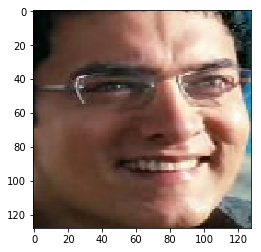

D:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [66]:
# Visual Inspection of predictions
idx = 2481
img_name = test.ID[idx]

img = imageio.imread(os.path.join('age_detection_test/Test', img_name))
plt.imshow(np.array(Image.fromarray(img).resize((128, 128))))
pred = model.predict_classes(test_x)
print('Original:', train.Class[idx], 'Predicted:', lb.inverse_transform(pred[idx]))

#### This is the result at current 64.51% training accuracy of the model. 
#### The model can be further improved using hyper-parameter tuning as well as using other image processing techniques.